# Bias-Variance Trade-Off
## Introduction

Let us assume we have some sample that somewhat follows the function $f(x) = 2 \cdot \ln(x)$.

Obviously, in reality we never know the true function (otherwise what would be the point of doing any machine learning). However, what we usually have is a (noisy) sample based on which we wish to infer on the true underlying relationship between feature ($X$) and response ($y$). 

Before we start talking about bias and variance and its trade-off, let us first load some packages needed to visualize this and generate some random data (following the function states above). 

In [1]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
np.random.seed(123)
n = 100
x = np.linspace(0.01, 2, n)
y = 2 * np.log(x)
y_noise = y + np.random.normal(size=(n))

And here is how our random sample looks like. Without knowing the true relation between feature and response one could easily argue the dependent variable follow some linear function (or maybe a polynomail function with low order).

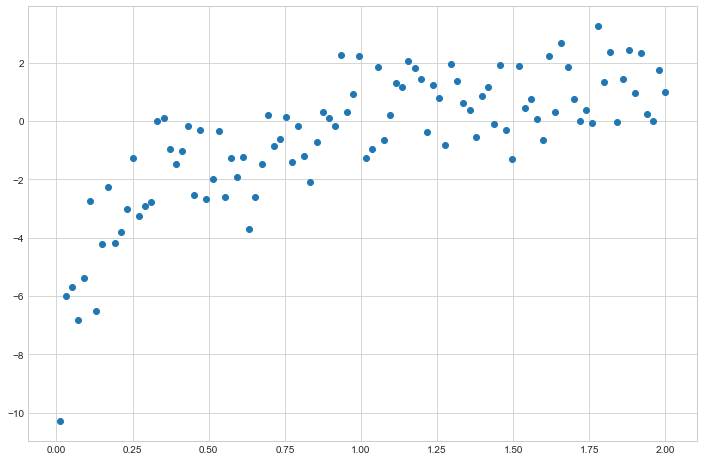

In [3]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y_noise);

## Bias

We defined 'bias' as follows: 
* The inability for a machine learning method (like linear regression) to capture the true relationship is called bias.
* Refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model.
* Tells us how accurate the model is - on average - across different possible training sets.

What if we approximate our sample with a linear regression? Below code does exactly this. 

In [4]:
# Create OLS object
reg = sm.OLS(y_noise, exog=sm.add_constant(x)).fit()

In [5]:
print('R2 = ', reg.rsquared)

R2 =  0.5619022149520068


In [6]:
reg_ln = sm.OLS(y_noise, exog=sm.add_constant(np.log(x))).fit()
print('R2 = ', reg_ln.rsquared)

R2 =  0.7611069500719894


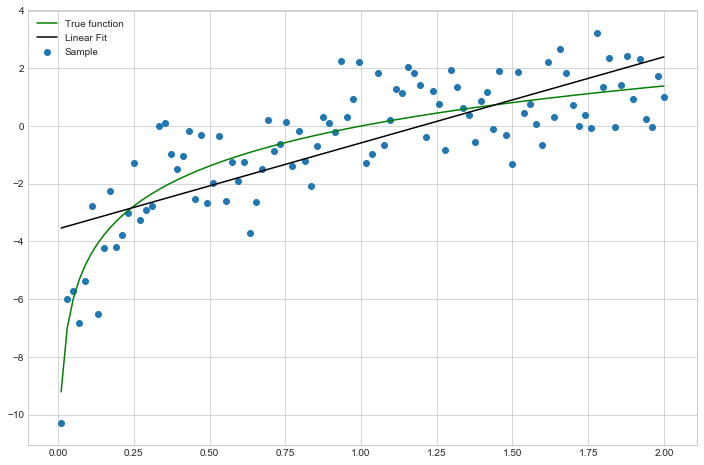

In [7]:
# Plot data
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='g', label="True function")
plt.scatter(x, y_noise, label="Sample")
plt.plot(x, reg.fittedvalues, c='k', label='Linear Fit')  # Linear fit
#plt.plot(x, reg_ln.fittedvalues, c='r', label='Ln Fit')
plt.legend();

Knowing the true relationship between feature and response we can see that we have a certain bias present in that we approximate a logarithmic function with a much more static linear function. Especially towards the edges of the spectrum we tend to misclasify the sample.

Let us instead look at a [kernel regression](http://mccormickml.com/2014/02/26/kernel-regression/), which (given low bandwidth, follows the observation very closely. 

In [8]:
# Kreate kernel regression object
kreg = sm.nonparametric.KernelReg(y_noise, exog=x, var_type='o', bw=[0.05]).fit()

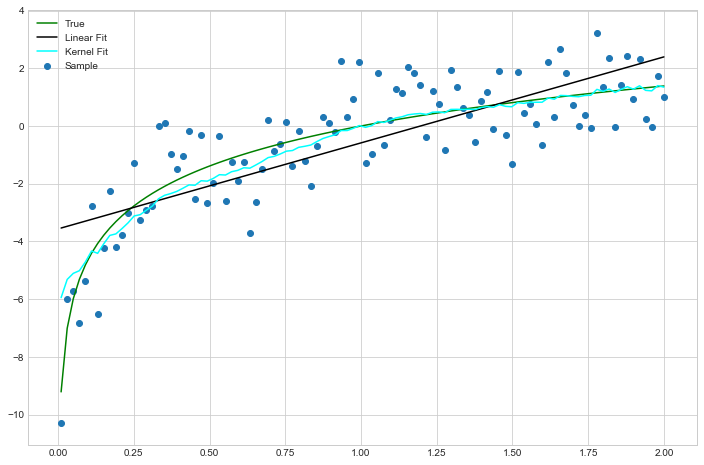

In [9]:
# Plot results
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='g', label="True")
plt.scatter(x, y_noise, label="Sample")
plt.plot(x, reg.fittedvalues, c='k', label='Linear Fit')
plt.plot(x, kreg[0], c='cyan', label='Kernel Fit')  # Linear fit
plt.legend();

Here we see that a Kernel regression is much better at approximating the true function than a simple linear model. Therefore, the bias for the more complex function is lower and should be preferred. 

## Variance

This is how we defined variance: 
* Variance refers to the amount by which $\hat{f}$ would change if we estimated it using a different (training) sample.
* Ideally, our estimate of $\hat{f}$ does not vary too much between training sets.
* Tells us how sensitive the learning algorithm is to small changes in the training set

Now let us see how the two approximation functions (linear and kernel regression) fare when we just use a subset of overall sample. This we do to see the variance in the function $\hat{f}$ between different training sets.

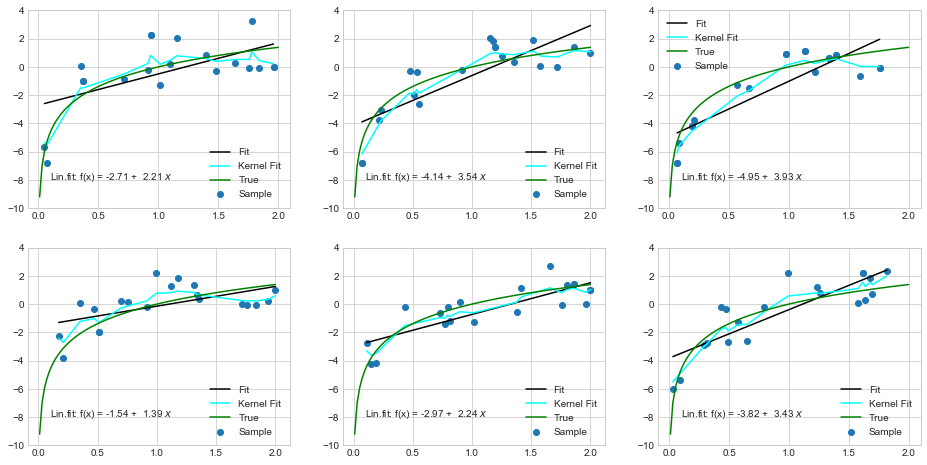

In [10]:
plt.figure(figsize=(16, 8))
for i in range(1, 7):
    indices = np.sort(np.random.randint(0, x.shape[0], 20))
    reg = sm.OLS(y_noise[indices], exog=sm.add_constant(x[indices])).fit()
    kreg = sm.nonparametric.KernelReg(y_noise[indices], exog=x[indices], var_type='o', bw=[0.05]).fit()
    plt.subplot(2, 3, i)
    plt.plot(x[indices], reg.fittedvalues, c='k', label='Fit')
    plt.plot(x[indices], kreg[0], c='cyan', label='Kernel Fit')
    plt.plot(x, y, color='g', label="True")
    plt.ylim(-10, 4)
    plt.scatter(x[indices], y_noise[indices], label="Sample")
    plt.text(0.1, -8, 'Lin.fit: f(x) = {0: .2f} + {1: .2f} $x$'.format(reg.params[0], reg.params[1]))
    plt.legend();


Here it becomes pretty clear that for the kernel regression the variance is high as this regression is simply too dependent on the actual sample. The linear regression however, is much more stable and produces +/- the same results independent of the sample. Therefore its model variance is low and linear model should be preferred over a kernel model. 

## Conclusion

The goal is obviously to have both low bias as well as low variance. We have seen from the above plots that in one case the more complex approach (kernel) produces lower bias than the less complex. At the same time, we have also observed that for a more complex model the variance is much higher from sample to sample than with a more static/less complex mode. This shows the trade-off we are: it is impossible to have both at the same time meaning that we have to find a sweetspot in between. 

For further information see e.g. [this]() or other ressources.

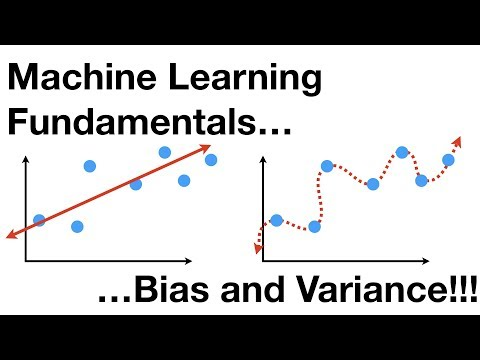

In [11]:
from IPython.display import YouTubeVideo
from datetime import timedelta

YouTubeVideo('EuBBz3bI-aA', start=int(timedelta(hours=0, minutes=0, seconds=17).total_seconds()))